https://huggingface.co/learn/audio-course/chapter1/audio_data

In [ ]:
!pip install librosa

# Audio as a waveform

In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

c:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [6]:
sampling_rate

22050

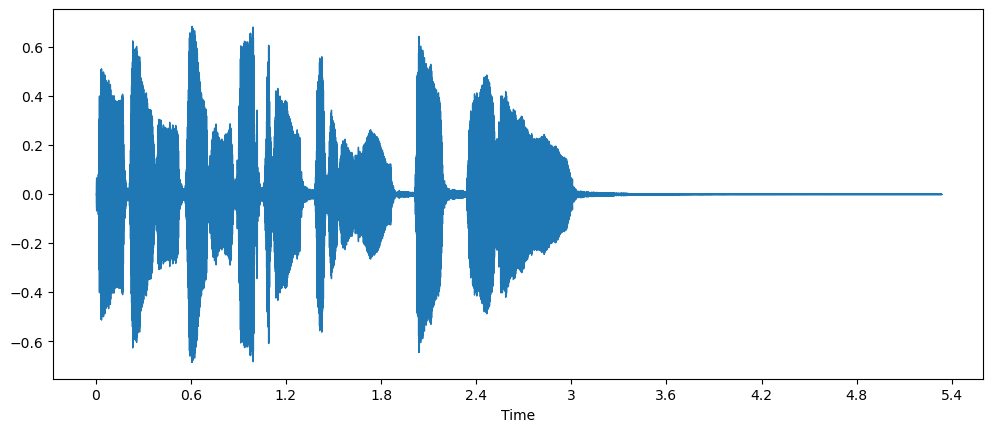

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

# The frequency spectrum

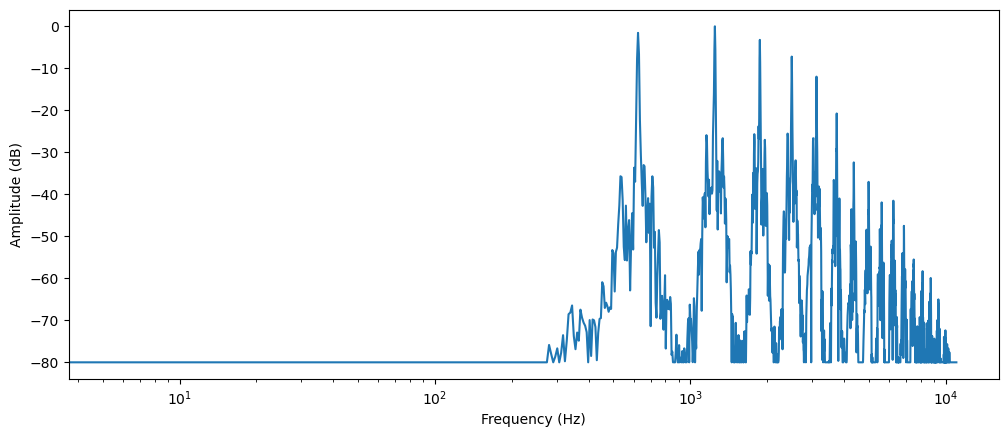

In [7]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
# convert the amplitude values to the decibel scale
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# spectrogram

A spectrogram plots the frequency content of an audio signal as it changes over time.<br>
It allows you to see time, frequency, and amplitude all on one graph.<br>
The algorithm that performs this computation is the STFT or Short Time Fourier Transform.

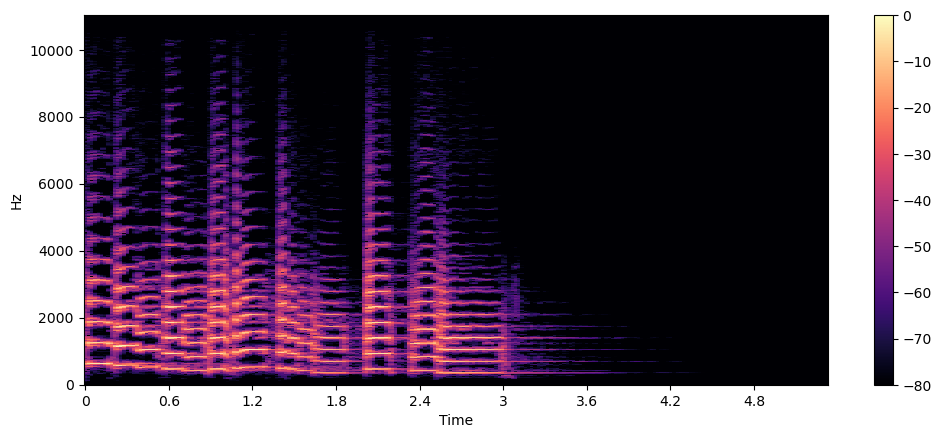

In [8]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

## Mel spectrogram
A mel spectrogram is a variation of the spectrogram that is commonly used <br>
in speech processing and machine learning tasks.
<br>
<br>It is similar to a spectrogram in that it shows the frequency content<br>
 of an audio signal over time, but on a different frequency axis.<br>

 <b>The mel scale is a perceptual scale that approximates the non-linear frequency response of the human ear.</b>

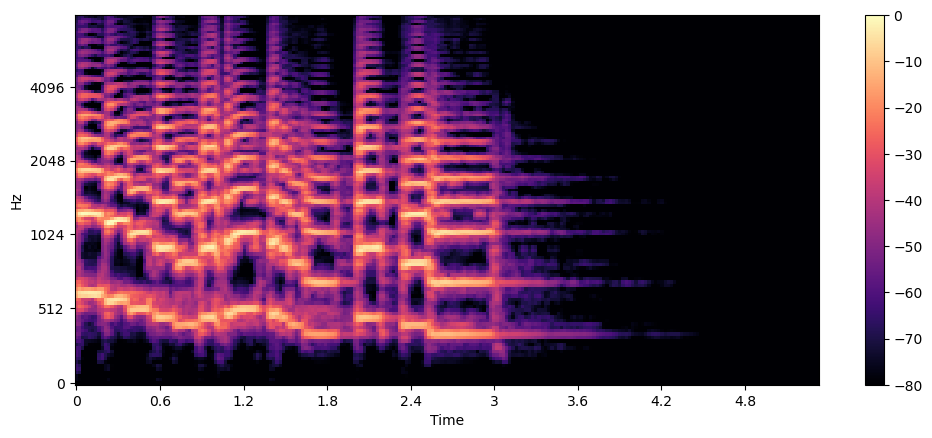

In [9]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()